In [2]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
spark=SparkSession.builder.appName('Practise').getOrCreate()

In [5]:
spark

In [6]:
df=spark.read.csv('diabetes.csv')

In [7]:
df = spark.read.option('header','true').option("delimiter", ";").csv('diabetes.csv')

In [8]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|  31|                   0.248| 26|      1|


In [9]:
df=spark.read.option('header','true').option("delimiter", ";").csv('diabetes.csv')

In [10]:
type(df)

pyspark.sql.dataframe.DataFrame

In [11]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|  31|                   0.248| 26|      1|


In [12]:
df.printSchema()
#kima .info()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)



In [13]:
df.select(['Age','Outcome']).show()

+---+-------+
|Age|Outcome|
+---+-------+
| 50|      1|
| 31|      0|
| 32|      1|
| 21|      0|
| 33|      1|
| 30|      0|
| 26|      1|
| 29|      0|
| 53|      1|
| 54|      1|
| 30|      0|
| 34|      1|
| 57|      0|
| 59|      1|
| 51|      1|
| 32|      1|
| 31|      1|
| 31|      1|
| 33|      0|
| 32|      1|
+---+-------+
only showing top 20 rows



In [14]:
df.dtypes

[('Pregnancies', 'string'),
 ('Glucose', 'string'),
 ('BloodPressure', 'string'),
 ('SkinThickness', 'string'),
 ('Insulin', 'string'),
 ('BMI', 'string'),
 ('DiabetesPedigreeFunction', 'string'),
 ('Age', 'string'),
 ('Outcome', 'string')]

In [15]:
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [16]:
from pyspark.sql.functions import col,sum, isnan, when, count

In [17]:
num_rows = df.count()
num_cols = len(df.columns)
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  768
Number of columns:  9


In [18]:
### checking the number of null values in each column 
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [19]:
df.filter("Age<=21").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          1|     73|           50|           10|      0|  23|                   0.248| 21|      0|
|          2|     84|            0|            0|      0|   0|                   0.304| 21|      0|
|          1|     80|           55|            0|      0|19.1|                   0.258| 21|      0|
|          2|    142|           82|           18|     64|24.7|                   0.761| 21|      0|
|          0|    125|           96|            0|      0|22.5|                   0.262| 21|      0|
|          1|    126|           56|           29|    152|28.7|                   0.801| 21|      0|


In [20]:
df.select('Age', 'Outcome').filter((col('Age')<=21 )& (col('Outcome') == 1)).show()

+---+-------+
|Age|Outcome|
+---+-------+
| 21|      1|
| 21|      1|
| 21|      1|
| 21|      1|
| 21|      1|
+---+-------+



In [21]:
from pyspark.sql.functions import mean
bloodp = df.select(mean("BloodPressure")).collect()[0][0]
print(bloodp)

69.10546875


In [22]:
df.filter("BloodPressure<69.10546875").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          3|     78|           50|           32|     88|  31|                   0.248| 26|      1|
|         10|    115|            0|            0|      0|35.3|                   0.134| 29|      0|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|


In [23]:
from pyspark.sql.functions import corr

correlation_matrix = df.select([corr(col1, col2).alias(f"{col1}_{col2}") for col1 in df.columns for col2 in df.columns]).toPandas()

print(correlation_matrix)


   Pregnancies_Pregnancies  Pregnancies_Glucose  Pregnancies_BloodPressure  \
0                      1.0             0.129459                   0.141282   

   Pregnancies_SkinThickness  Pregnancies_Insulin  Pregnancies_BMI  \
0                  -0.081672            -0.073535         0.017683   

   Pregnancies_DiabetesPedigreeFunction  Pregnancies_Age  Pregnancies_Outcome  \
0                             -0.033523         0.544341             0.221898   

   Glucose_Pregnancies  ...  Age_Outcome  Outcome_Pregnancies  \
0             0.129459  ...     0.238356             0.221898   

   Outcome_Glucose  Outcome_BloodPressure  Outcome_SkinThickness  \
0         0.466581               0.065068               0.074752   

   Outcome_Insulin  Outcome_BMI  Outcome_DiabetesPedigreeFunction  \
0         0.130548     0.292695                          0.173844   

   Outcome_Age  Outcome_Outcome  
0     0.238356              1.0  

[1 rows x 81 columns]


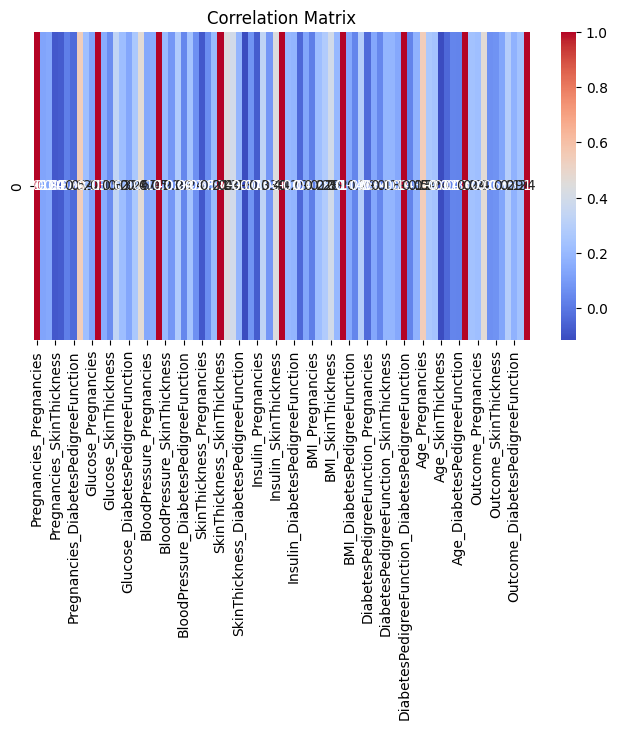

In [24]:
# Compute the correlation matrix as a PySpark DataFrame
correlation_matrix = df.select([corr(col1, col2).alias(f"{col1}_{col2}") for col1 in df.columns for col2 in df.columns]).toPandas()

# Create a heatmap using Seaborn
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title("Correlation Matrix")
plt.show()

In [25]:
from pyspark.sql.types import IntegerType

# Boucle pour parcourir toutes les colonnes
for c in df.columns:
    df = df.withColumn(c, col(c).cast(IntegerType()))
df.dtypes


[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'int'),
 ('DiabetesPedigreeFunction', 'int'),
 ('Age', 'int'),
 ('Outcome', 'int')]

Correlation between Age and Outcome:  0.23835598302719757


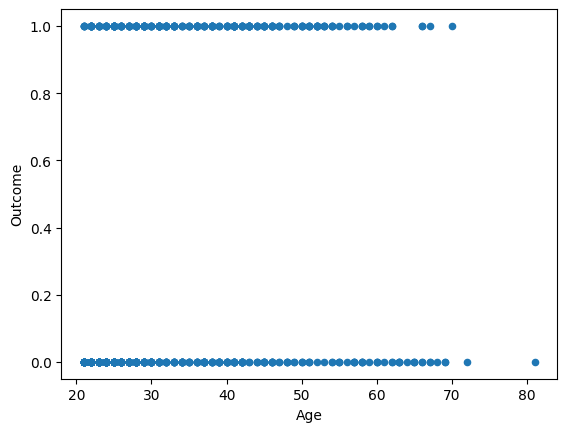

In [26]:
from pyspark.sql.functions import corr

# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('Age', 'Outcome')

# Affichage de la corrélation
print('Correlation between Age and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('Age', 'Outcome').toPandas().plot(kind='scatter', x='Age', y='Outcome')
plt.show()


Correlation between Pregnancies and Outcome:  0.22189815303398636


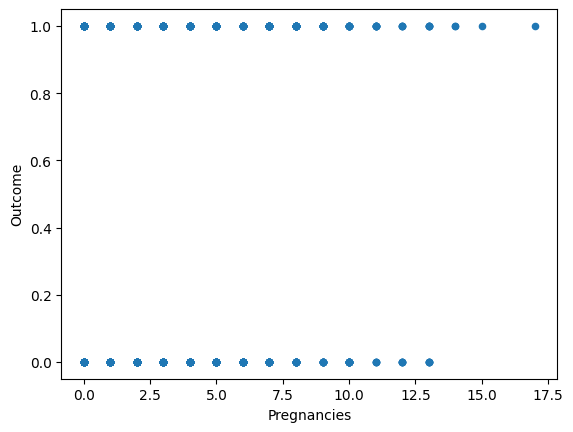

In [27]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('Pregnancies', 'Outcome')

# Affichage de la corrélation
print('Correlation between Pregnancies and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('Pregnancies', 'Outcome').toPandas().plot(kind='scatter', x='Pregnancies', y='Outcome')
plt.show()

Correlation between Glucose and Outcome:  0.4665813983068737


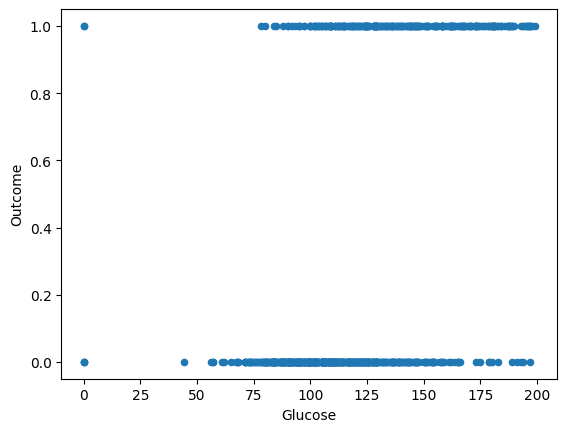

In [28]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('Glucose', 'Outcome')

# Affichage de la corrélation
print('Correlation between Glucose and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('Glucose', 'Outcome').toPandas().plot(kind='scatter', x='Glucose', y='Outcome')
plt.show()

Correlation between BloodPressure and Outcome:  0.06506835955033274


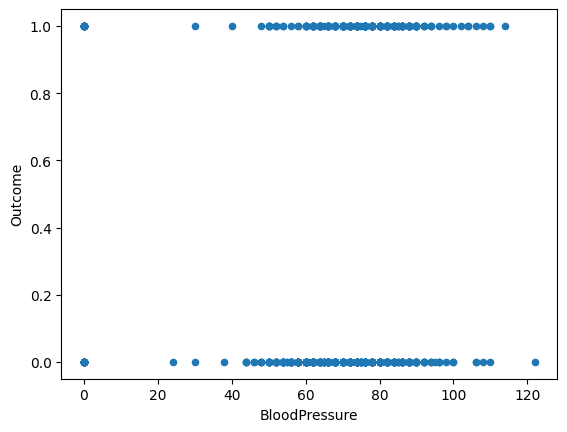

In [29]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('BloodPressure', 'Outcome')

# Affichage de la corrélation
print('Correlation between BloodPressure and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('BloodPressure', 'Outcome').toPandas().plot(kind='scatter', x='BloodPressure', y='Outcome')
plt.show()

Correlation between colSkinThickness and Outcome:  0.07475223191831945


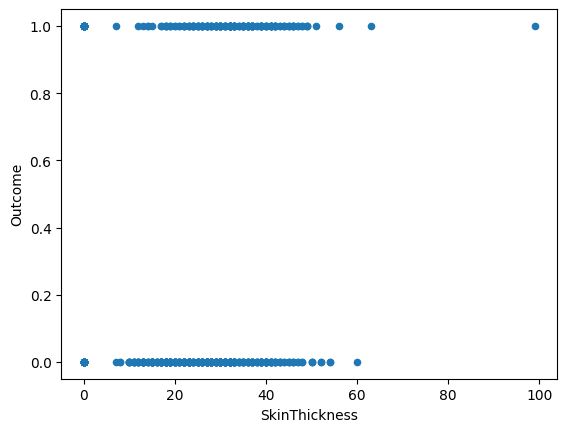

In [30]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('SkinThickness', 'Outcome')

# Affichage de la corrélation
print('Correlation between colSkinThickness and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('SkinThickness', 'Outcome').toPandas().plot(kind='scatter', x='SkinThickness', y='Outcome')
plt.show()

Correlation between Insulin and Outcome:  0.13054795488404794


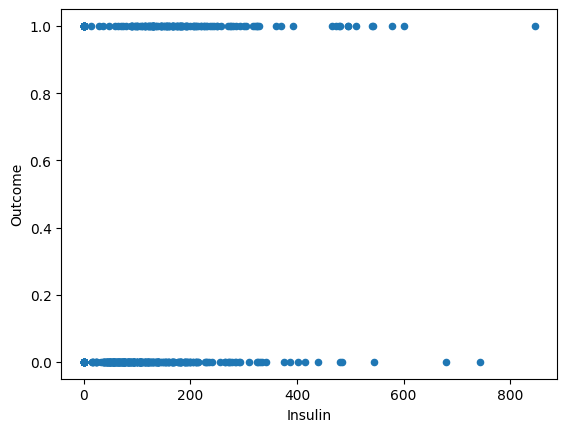

In [31]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('Insulin', 'Outcome')

# Affichage de la corrélation
print('Correlation between Insulin and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('Insulin', 'Outcome').toPandas().plot(kind='scatter', x='Insulin', y='Outcome')
plt.show()

Correlation between BMI and Outcome:  0.29249363017685065


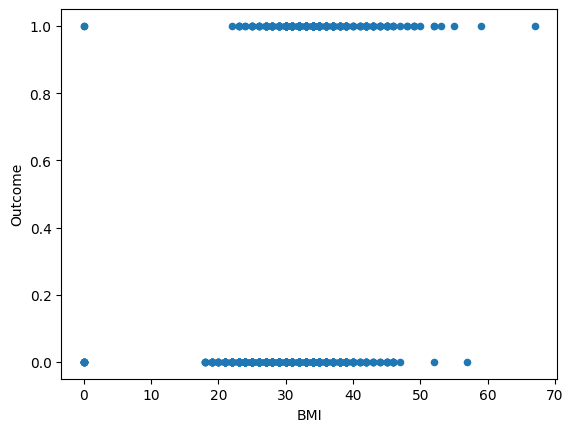

In [32]:
# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('BMI', 'Outcome')

# Affichage de la corrélation
print('Correlation between BMI and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('BMI', 'Outcome').toPandas().plot(kind='scatter', x='BMI', y='Outcome')
plt.show()

Correlation between diabetespedigreefunction and Outcome:  0.12616369074433847


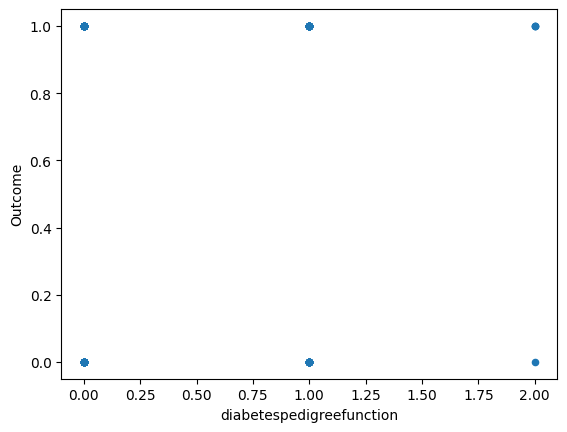

In [33]:

# Calcul de la corrélation entre les deux colonnes
corr_value = df.corr('diabetespedigreefunction', 'Outcome')

# Affichage de la corrélation
print('Correlation between diabetespedigreefunction and Outcome: ', corr_value)

# Visualisation de la corrélation
df.select('diabetespedigreefunction', 'Outcome').toPandas().plot(kind='scatter', x='diabetespedigreefunction', y='Outcome')
plt.show()

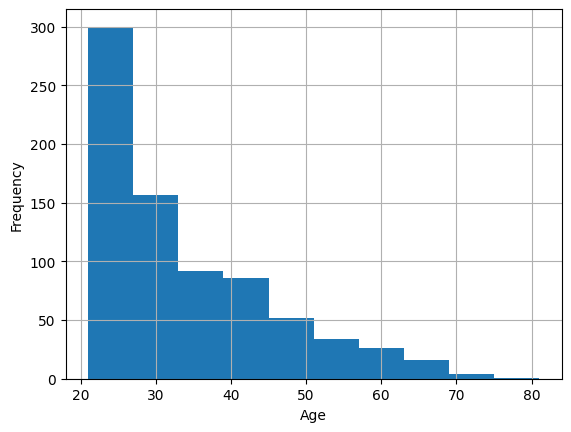

In [34]:
from pyspark_dist_explore import hist

age_series = df.select(col('Age')).toPandas()['Age']
age_series.hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Age distribution')

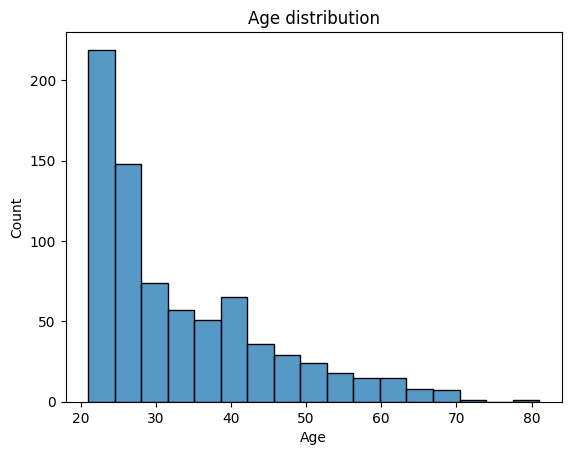

In [35]:
#sns.displot(df['Age'], kde=False).set_title('age')

ages = df.select(col('Age')).toPandas()
sns.histplot(data=ages, x='Age', kde=False)
plt.title('Age distribution')

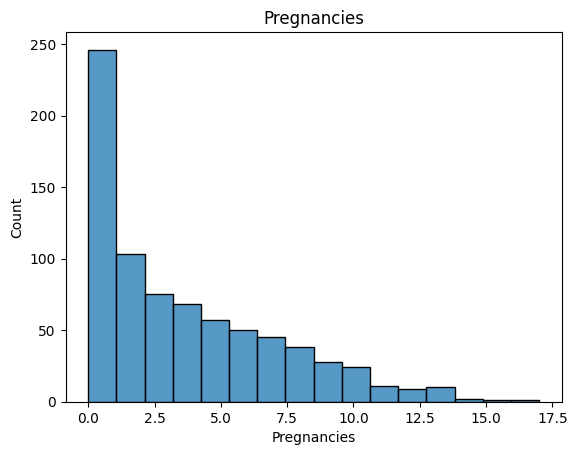

In [36]:
pregnancies = df.select(col('Pregnancies')).toPandas()
sns.histplot(data=pregnancies, x='Pregnancies', kde=False)
plt.title('Pregnancies')
plt.show()

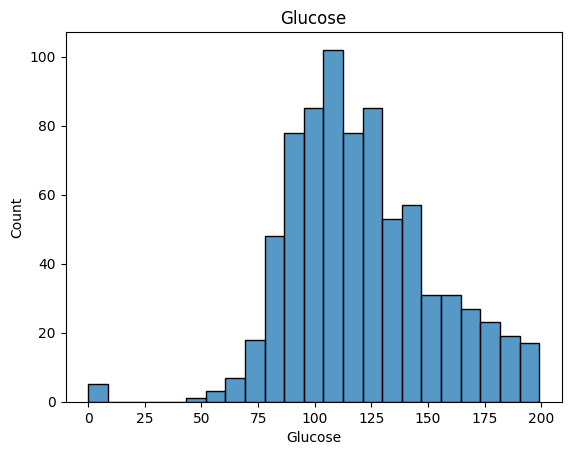

In [37]:
pregnancies = df.select(col('Glucose')).toPandas()
sns.histplot(data=pregnancies, x='Glucose', kde=False)
plt.title('Glucose')
plt.show()

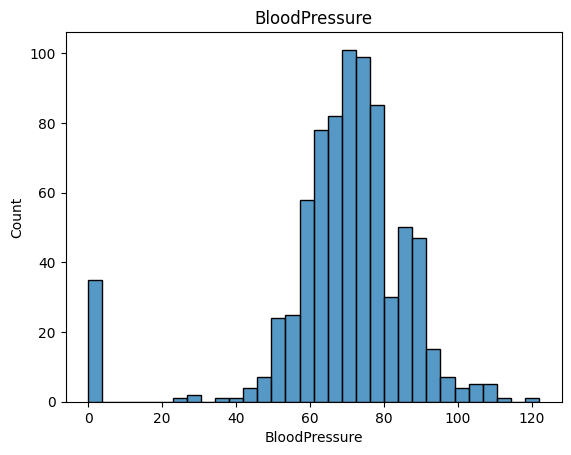

In [38]:
pregnancies = df.select(col('BloodPressure')).toPandas()
sns.histplot(data=pregnancies, x='BloodPressure', kde=False)
plt.title('BloodPressure')
plt.show()

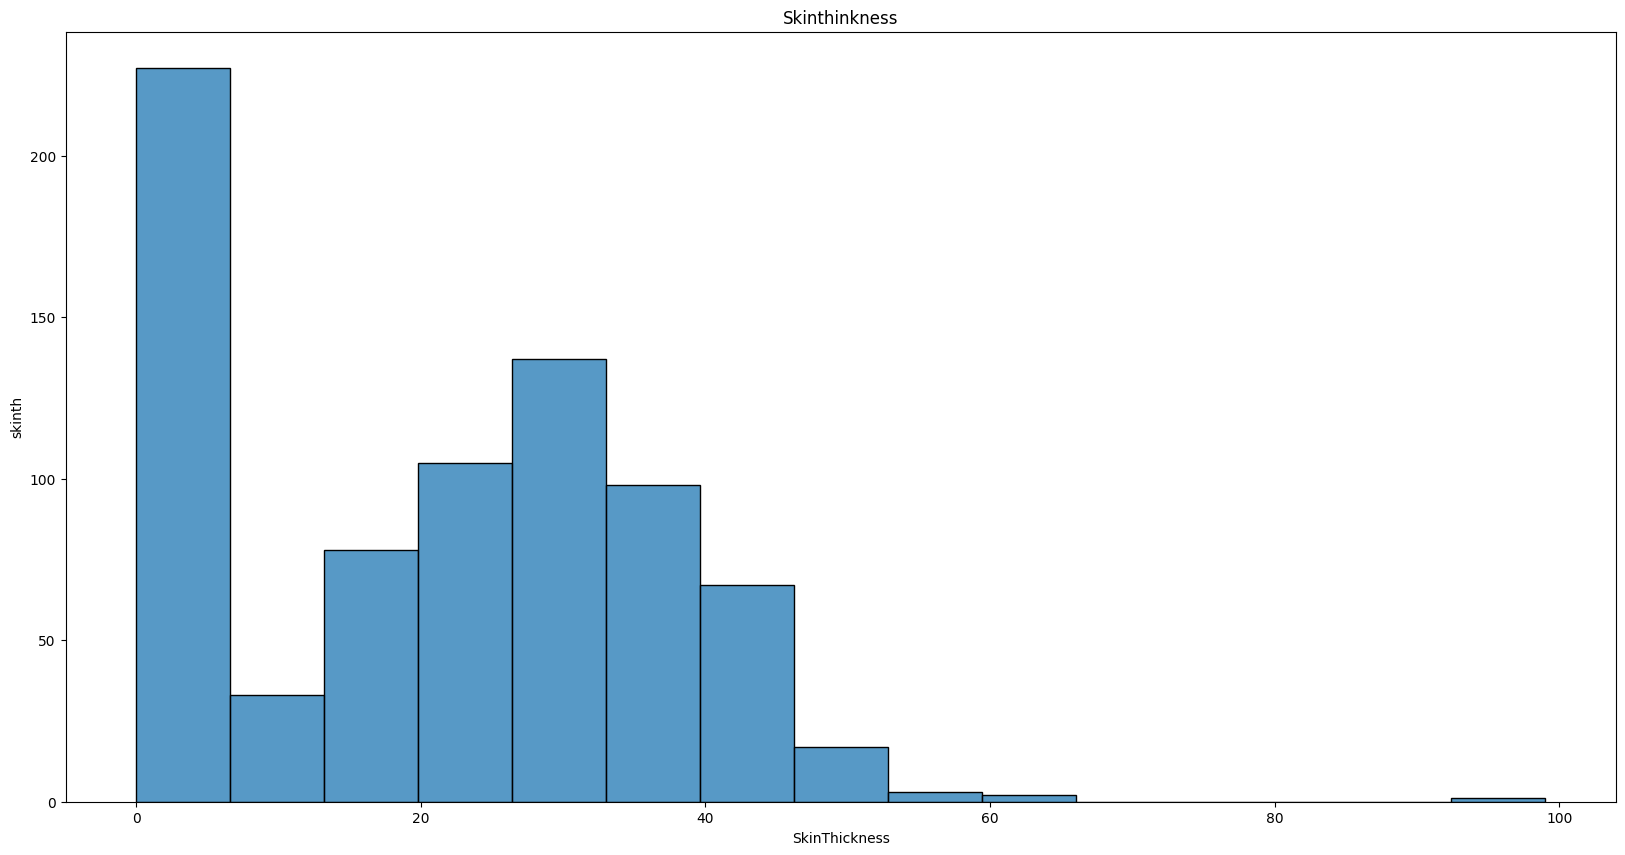

In [39]:
skin_thickness = df.select(col('SkinThickness')).toPandas()
plt.rcParams["figure.figsize"]=(20,10)
sns.histplot(data=skin_thickness, x='SkinThickness')
plt.xlabel("SkinThickness")
plt.ylabel("skinth")
plt.title('Skinthinkness')
plt.show()

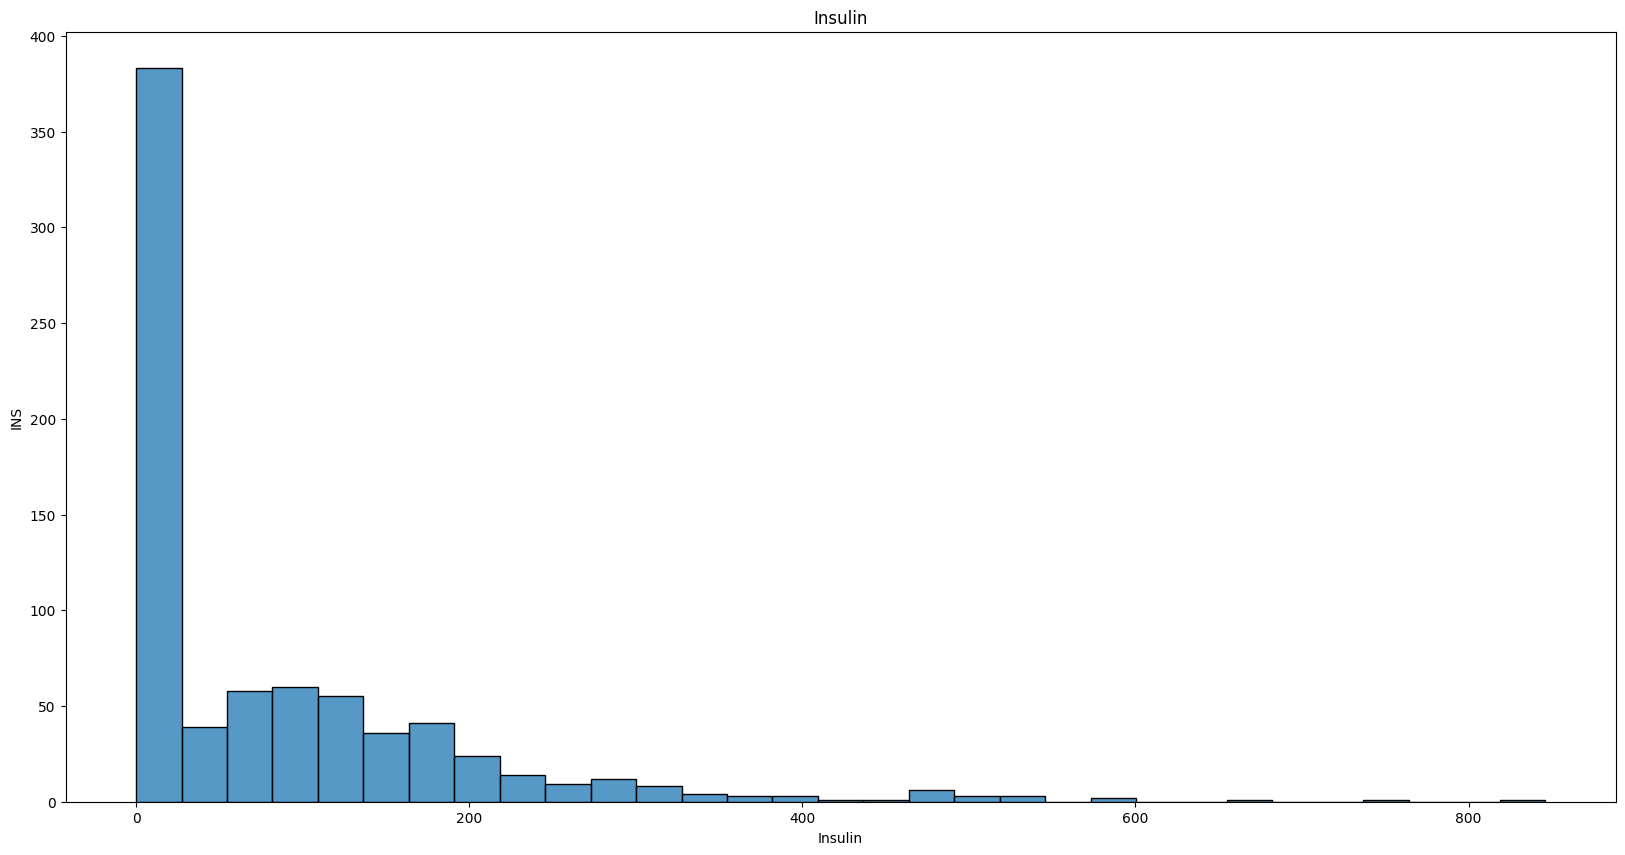

In [40]:
skin_thickness = df.select(col('Insulin')).toPandas()
plt.rcParams["figure.figsize"]=(20,10)
sns.histplot(data=skin_thickness, x='Insulin')
plt.xlabel("Insulin")
plt.ylabel("INS")
plt.title('Insulin')
plt.show()

In [41]:
df = df.toPandas() 

In [42]:
#partieml 
#x = df.select('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')
x=df.drop(columns='Outcome',axis=1)

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33,0,50
1,1,85,66,29,0,26,0,31
2,8,183,64,0,0,23,0,32
3,1,89,66,23,94,28,0,21
4,0,137,40,35,168,43,2,33


In [43]:
#y=df.select('Outcome')
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int32

In [44]:
#y= y.toPandas()
#x = df.toPandas()

In [45]:
type(y)

pandas.core.series.Series

In [46]:
scaler=StandardScaler()

In [47]:
scaler.fit(x)

StandardScaler()

In [48]:
sta=scaler.transform(x)

In [49]:
sta

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.1848165 ,
        -0.25824442,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.70628081,
        -0.25824442, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.08817966,
        -0.25824442, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.70628081,
        -0.25824442, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.19708235,
        -0.25824442,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.19708235,
        -0.25824442, -0.87137393]])

In [50]:
from pyspark.ml.feature import VectorAssembler 
#,StandardScaler

In [51]:
#input_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
#assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
#scaled_df = assembler.transform(df)
#scaler_model = scaler.fit(scaled_df)
#scaled_data = scaler_model.transform(scaled_df)

In [52]:
x =sta
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.1848165 ,
        -0.25824442,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.70628081,
        -0.25824442, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.08817966,
        -0.25824442, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.70628081,
        -0.25824442, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.19708235,
        -0.25824442,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.19708235,
        -0.25824442, -0.87137393]])

In [53]:
type(x)

numpy.ndarray

In [54]:
# ML Model

#scaler=StandardScaler()
#scaler.fit(x)
#sta=scaler.transform(x)

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [56]:
x_train.shape

(614, 8)

In [57]:
y_train.shape

(614,)

In [58]:
classifier=svm.SVC(kernel='linear')

In [59]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
x_train_prediction=classifier.predict(x_train)

In [61]:
x_train_prediction

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [62]:
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [63]:
training_data_accuracy

0.7736156351791531

In [64]:
x_test_prediction=classifier.predict(x_test)

In [65]:
x_test_prediction

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [66]:
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [67]:
test_data_accuracy

0.7597402597402597

In [68]:
input_data=(4,110,92,0,0,37.6,0.191,30)
# changing the input data to numpy array 
input_data_as_numpy_array=np.array(input_data)
input_data_as_numpy_array

array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
        30.   ])

In [69]:
 # reshape the array as we are predictinf gor one insatnce 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]])

In [70]:
# standardize the input data 
std_data=scaler.transform(input_data_reshaped)

c:\Users\rania\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
std_data

array([[ 0.04601433, -0.34096773,  1.18359575, -1.28821221, -0.69289057,
         0.77039474,  0.43050754, -0.27575966]])

In [72]:
prediction=classifier.predict(std_data)

In [73]:
print(prediction)

[0]


In [74]:
if (prediction[0]==0):
    print('the person is not diabetic')
else : 
    print('the person is diabetic ')

the person is not diabetic


In [75]:
# taking another example 
input_data=(5,166,72,19,175,25.8,0.587,51)
# changing the input data to numpy array 
input_data_as_numpy_array=np.asarray(input_data)
# reshape the array as we arae predicting for one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# STANDARDIZE THE INPUT DATA 
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.73174074
   1.85849591  1.51108316]]
[1]


c:\Users\rania\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
if(prediction[0]==0):
    print('the person is not diabetic')
else :
    print('the person is diabetic ')

the person is diabetic 
